In [1]:
from tqdm.auto import tqdm
import geopandas as gpd
import pandas as pd
from shapely import box
import matplotlib.pyplot as plt
nz_bounds = box(163.08,-50.12,180,-31.31)

In [2]:
overture = pd.read_csv("https://uoa-eresearch.github.io/overture_nz/overture_NZ.csv")
# Add top level category from taxonomy
overture_taxonomy = pd.read_csv("https://raw.githubusercontent.com/OvertureMaps/schema/main/task-force-docs/places/overture_categories.csv", sep=";")
overture_taxonomy["Overture Taxonomy"] = overture_taxonomy["Overture Taxonomy"].apply(lambda s: s.strip("[]").split(","))
overture_taxonomy.set_index("Category code", inplace=True)
overture_taxonomy = overture_taxonomy["Overture Taxonomy"]
overture["top_level_category"] = overture.main_category.apply(lambda c: overture_taxonomy.get(c, [None])[0])
overture = overture[overture.top_level_category == "religious_organization"]
overture = gpd.GeoDataFrame(overture, geometry=gpd.points_from_xy(overture.lng, overture.lat), crs=4326)
overture = overture[overture.within(nz_bounds)]
overture

,name,main_category,alternate_categories,lat,lng,top_level_category,geometry
46,"Oban Presbyterian Church, Stewart Island",church_cathedral,landmark_and_historical_building,-46.896301,168.130206,religious_organization,POINT (168.13021 -46.89630)
88,Bluff New Life Church,church_cathedral,NaN,-46.598960,168.340702,religious_organization,POINT (168.34070 -46.59896)
184,Wicklow Street Seventh-day Adventist Church,church_cathedral,NaN,-46.451117,168.364935,religious_organization,POINT (168.36493 -46.45112)
237,Inspire Community Church Invercargill,pentecostal_church,"community_center,senior_citizen_services",-46.424380,168.350350,religious_organization,POINT (168.35035 -46.42438)
239,New River CMFI Community Church - Southland NZ,religious_organization,NaN,-46.424280,168.350810,religious_organization,POINT (168.35081 -46.42428)
...,...,...,...,...,...,...,...
137288,Bream Bay Assembly of God,religious_organization,"pentecostal_church,community_services_non_profits",-35.882700,174.451380,religious_organization,POINT (174.45138 -35.88270)
137439,Lifepoint Church,church_cathedral,religious_organization,-35.822490,174.452050,religious_organization,POINT (174.45205 -35.82249)
137624,Lighthouse Church,church_cathedral,NaN,-35.634995,174.496478,religious_organization,POINT (174.49648 -35.63499)
137659,Tutukaka Coast Community Church,church_cathedral,community_services_non_profits,-35.627548,174.507135,religious_organization,POINT (174.50713 -35.62755)


In [3]:
overture.main_category.value_counts()

church_cathedral                 1730
religious_organization            637
catholic_church                   212
baptist_church                    168
anglican_church                    89
mosque                             55
buddhist_temple                    38
sikh_temple                        31
hindu_temple                       30
pentecostal_church                 14
mission                             7
evangelical_church                  5
convents_and_monasteries            5
synagogue                           4
jehovahs_witness_kingdom_hall       2
Name: main_category, dtype: int64

In [4]:
OSM = gpd.read_parquet("churches.parquet")
OSM = OSM[OSM.within(nz_bounds)]
OSM

,lat,lng,name,religion,denomination,start_date,geometry
3458,-43.046537,172.784156,St Pauls Glenmark,christian,None,None,POINT (172.78416 -43.04654)
4099,-41.297903,173.016250,Chandrakirti Meditation Centre,buddhist,mahayana,None,POINT (173.01625 -41.29790)
146618,-36.953634,174.846633,Te Kaainga Rua,maori,None,None,POINT (174.84663 -36.95363)
152001,-36.267755,175.491994,St Johns,christian,interdenominational,None,POINT (175.49199 -36.26776)
153660,-36.845395,174.747533,Bishop's Residence,christian,catholic,None,POINT (174.74753 -36.84539)
...,...,...,...,...,...,...,...
1462176,-43.545520,172.665075,None,None,None,None,POINT (172.66508 -43.54552)
1462453,-36.957230,174.911417,None,buddhist,None,None,POINT (174.91142 -36.95723)
1462504,-36.964539,174.784263,The Church of Jesus Christ of Latter-day Saints,christian,mormon,None,POINT (174.78426 -36.96454)
1463003,-41.342699,174.763751,Wat Buddhacheymahaneat Theravada Buddhist Mona...,buddhist,theravada,1985,POINT (174.76375 -41.34270)


In [5]:
gmaps = gpd.read_file("https://uoa-eresearch.github.io/populartimes/data.geojson")
gmaps = gmaps[gmaps.category.str.contains("church", na=False, case=False) & gmaps.within(nz_bounds)]
gmaps

,name,address,category,link,code,live_info,populartimes,scraped_at,geometry
68,LIFE Central,"25 Normanby Road, Mount Eden, Auckland 1024",Church,https://www.google.com/maps/place/LIFE+Central...,4QH7+VV Auckland,None,None,2021-06-02 19:44:49,POINT (174.76469 -36.87031)
77,LIFE Head Office,"14 Normanby Road, Mount Eden, Auckland 1024",Church,https://www.google.com/maps/place/LIFE+Head+Of...,4QH7+VF Auckland,None,None,2021-06-02 19:45:59,POINT (174.76369 -36.87031)
107,LIFE,"Eden Business Park 14 Normanby Road, Mount Ede...",Church,https://www.google.com/maps/place/LIFE/data=!4...,4QH7+VG Auckland,None,None,2021-06-02 19:50:43,POINT (174.76381 -36.87031)
164,LIFE South,"3 Lakewood Court, Manukau City Centre, Aucklan...",Church,https://www.google.com/maps/place/LIFE+South/d...,2V4P+4P Auckland,None,None,2021-06-02 19:59:36,POINT (174.88681 -36.99469)
188,Assemblies of God in New Zealand,"89 Carruth Road, Papatoetoe, Auckland 2025",Church,https://www.google.com/maps/place/Assemblies+o...,2V97+CX Auckland,None,None,2021-06-02 20:47:15,POINT (174.86494 -36.98144)
...,...,...,...,...,...,...,...,...,...
106604,Knox Presbyterian Family Church,"115 Pomona Street, Georgetown, Invercargill 9812",Presbyterian church,https://www.google.com/maps/place/Knox+Presbyt...,H9G9+WJ Invercargill,None,None,2021-06-15 00:44:34,POINT (168.36906 -46.42269)
106634,City Impact Church Invercargill,"114 Dee Street, Invercargill 9810",Christian church,https://www.google.com/maps/place/City+Impact+...,H8RW+6Q Invercargill,None,"[ [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 97, 0, ...",2024-04-16 21:08:09,POINT (168.34694 -46.40944)
106690,Presbyterian Support Southland,"498-500 Tweed Street, Newfield, Invercargill 9812",Church,https://www.google.com/maps/place/Presbyterian...,H9JG+XJ Invercargill,None,None,2021-06-15 01:01:02,POINT (168.37656 -46.41756)
106700,St David's Church,"60 Regent Street, Newfield, Invercargill 9812",Presbyterian church,https://www.google.com/maps/place/St+David's+C...,H9HQ+Q3 Invercargill,None,None,2021-06-15 01:01:44,POINT (168.38769 -46.42056)


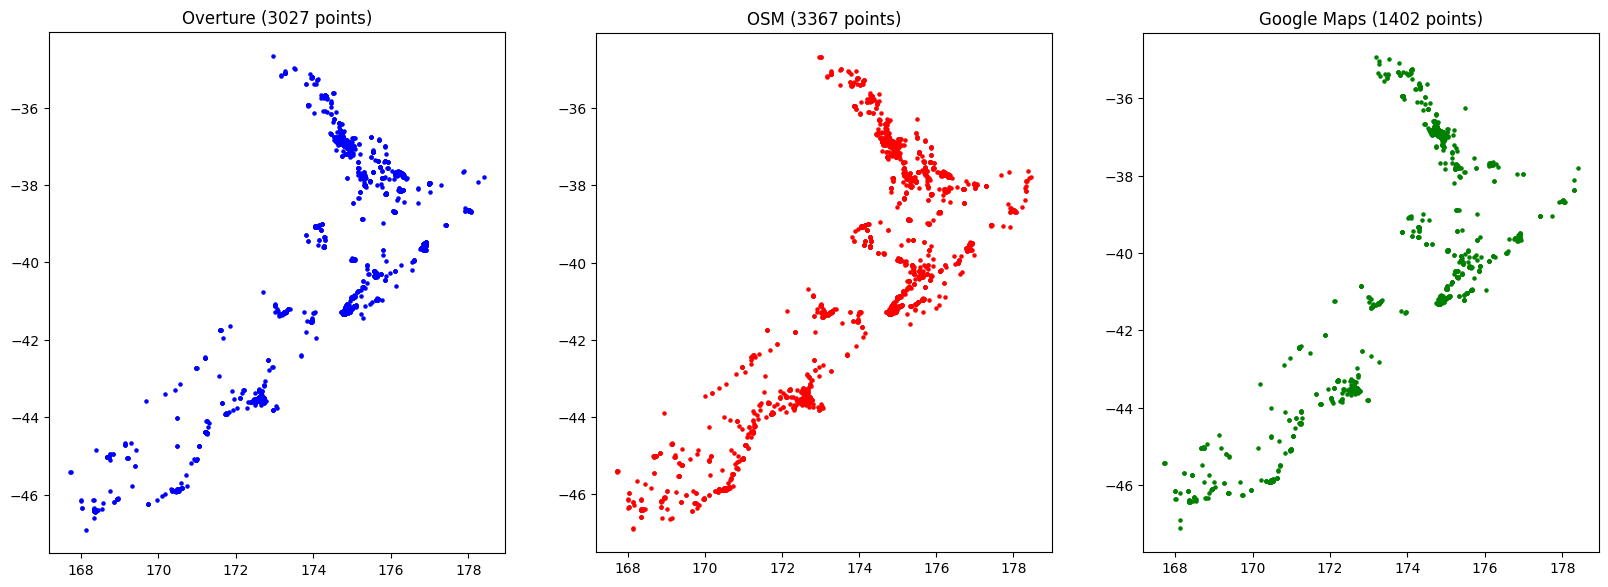

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
overture.plot(ax=ax1, color="blue", markersize=5)
ax1.set_title(f"Overture ({len(overture)} points)")
OSM.plot(ax=ax2, color="red", markersize=5)
ax2.set_title(f"OSM ({len(OSM)} points)")
gmaps.plot(ax=ax3, color="green", markersize=5)
ax3.set_title(f"Google Maps ({len(gmaps)} points)")
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
plt.show()